### Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import tree

### Importing Data

In [3]:
df_cen = pd.read_excel('G:\\Data Science - TYPE A\\Practise Project\\US house\\ushouseprice.xlsx')

In [132]:
df_cen

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income,FORECLOSURES In real estate,Num_Permit_given,construction_in_Dollars,Homesforsale,num_New_construction,BelowPoverty,Median Income,legal migration
0,1975-01-01,61.0900,67.14653,65.30488,0.98599,8.46667,5648.462,9.04712,19908,0.0000,0.000000,0.000000,0.000000,0.000000,210864.00,11800.105263,2.963
1,1976-01-01,65.5250,79.96264,69.05653,0.95022,7.71667,5952.809,8.86585,20346,0.0000,0.000000,0.000000,0.000000,0.000000,212303.00,12685.885213,3.097
2,1977-01-01,73.4350,78.82540,73.54636,1.00577,7.06667,6228.076,8.84519,20780,0.0000,0.000000,0.000000,0.000000,0.000000,213867.00,13571.974687,3.230
3,1978-01-01,83.7450,78.84679,79.15866,1.05957,6.06667,6572.819,9.64173,21497,0.0000,0.000000,0.000000,0.000000,0.000000,215656.00,15063.951880,3.363
4,1979-01-01,95.1325,85.63207,88.06755,1.10358,5.83333,6780.924,11.20365,21672,0.0000,0.000000,0.000000,0.000000,0.000000,222903.00,16460.918797,3.266
5,1980-01-01,102.6675,100.00000,100.00000,0.95959,7.14167,6763.514,13.74212,21584,0.0000,0.000000,0.000000,0.000000,0.000000,225027.00,17709.903759,3.169
6,1981-01-01,107.2375,108.67516,110.33472,0.98142,7.60000,6935.153,16.64151,21891,0.0000,0.000000,0.000000,0.000000,0.000000,227157.00,19074.131078,3.073
7,1982-01-01,108.4600,101.20645,117.09981,0.95332,9.70833,6810.120,16.04365,22156,0.0000,0.000000,0.000000,0.000000,0.000000,229412.00,20170.902256,2.976
8,1983-01-01,116.2425,136.01719,120.86156,0.91438,9.61667,7122.290,13.23538,22714,0.0000,0.000000,0.000000,0.000000,0.000000,231700.00,20885.191980,2.879
9,1984-01-01,121.4575,135.71240,126.05926,0.86582,7.52500,7637.704,13.87769,24062,0.0000,0.000000,0.000000,0.000000,0.000000,233816.00,22415.151880,2.850


### Data Wrangling & Analysis

In [110]:
df_cen.fillna(0)

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income,FORECLOSURES In real estate,Num_Permit_given,construction_in_Dollars,Homesforsale,num_New_construction,BelowPoverty,Median Income,legal migration
0,1975-01-01,61.0900,67.14653,65.30488,0.98599,8.46667,5648.462,9.04712,19908,0.0000,0.000000,0.000000,0.000000,0.000000,210864.00,11800.105263,2.963
1,1976-01-01,65.5250,79.96264,69.05653,0.95022,7.71667,5952.809,8.86585,20346,0.0000,0.000000,0.000000,0.000000,0.000000,212303.00,12685.885213,3.097
2,1977-01-01,73.4350,78.82540,73.54636,1.00577,7.06667,6228.076,8.84519,20780,0.0000,0.000000,0.000000,0.000000,0.000000,213867.00,13571.974687,3.230
3,1978-01-01,83.7450,78.84679,79.15866,1.05957,6.06667,6572.819,9.64173,21497,0.0000,0.000000,0.000000,0.000000,0.000000,215656.00,15063.951880,3.363
4,1979-01-01,95.1325,85.63207,88.06755,1.10358,5.83333,6780.924,11.20365,21672,0.0000,0.000000,0.000000,0.000000,0.000000,222903.00,16460.918797,3.266
5,1980-01-01,102.6675,100.00000,100.00000,0.95959,7.14167,6763.514,13.74212,21584,0.0000,0.000000,0.000000,0.000000,0.000000,225027.00,17709.903759,3.169
6,1981-01-01,107.2375,108.67516,110.33472,0.98142,7.60000,6935.153,16.64151,21891,0.0000,0.000000,0.000000,0.000000,0.000000,227157.00,19074.131078,3.073
7,1982-01-01,108.4600,101.20645,117.09981,0.95332,9.70833,6810.120,16.04365,22156,0.0000,0.000000,0.000000,0.000000,0.000000,229412.00,20170.902256,2.976
8,1983-01-01,116.2425,136.01719,120.86156,0.91438,9.61667,7122.290,13.23538,22714,0.0000,0.000000,0.000000,0.000000,0.000000,231700.00,20885.191980,2.879
9,1984-01-01,121.4575,135.71240,126.05926,0.86582,7.52500,7637.704,13.87769,24062,0.0000,0.000000,0.000000,0.000000,0.000000,233816.00,22415.151880,2.850


In [107]:
df_cen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         47 non-null     datetime64[ns]
 1   House_Price_Index            47 non-null     float64       
 2   Stock_Price_Index            47 non-null     float64       
 3   Consumer_Price_Index         47 non-null     float64       
 4   Population                   47 non-null     float64       
 5   Unemployment_Rate            47 non-null     float64       
 6   Real_GDP                     47 non-null     float64       
 7   Mortgage_Rate                47 non-null     float64       
 8   Real_Disposable_Income       47 non-null     int64         
 9   FORECLOSURES In real estate  46 non-null     float64       
 10  Num_Permit_given             46 non-null     float64       
 11  construction_in_Dollars      46 non-null     fl

### Exploratory Data Analysis

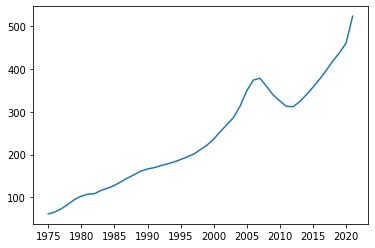

In [111]:
plt.plot(df_cen.Date,df_cen.House_Price_Index)

In [136]:
df = df_cen.iloc[0:,1:]
df

,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income,FORECLOSURES In real estate,Num_Permit_given,construction_in_Dollars,Homesforsale,num_New_construction,BelowPoverty,Median Income,legal migration
0,61.0900,67.14653,65.30488,0.98599,8.46667,5648.462,9.04712,19908,0.0000,0.000000,0.000000,0.000000,0.000000,210864.00,11800.105263,2.963
1,65.5250,79.96264,69.05653,0.95022,7.71667,5952.809,8.86585,20346,0.0000,0.000000,0.000000,0.000000,0.000000,212303.00,12685.885213,3.097
2,73.4350,78.82540,73.54636,1.00577,7.06667,6228.076,8.84519,20780,0.0000,0.000000,0.000000,0.000000,0.000000,213867.00,13571.974687,3.230
3,83.7450,78.84679,79.15866,1.05957,6.06667,6572.819,9.64173,21497,0.0000,0.000000,0.000000,0.000000,0.000000,215656.00,15063.951880,3.363
4,95.1325,85.63207,88.06755,1.10358,5.83333,6780.924,11.20365,21672,0.0000,0.000000,0.000000,0.000000,0.000000,222903.00,16460.918797,3.266
5,102.6675,100.00000,100.00000,0.95959,7.14167,6763.514,13.74212,21584,0.0000,0.000000,0.000000,0.000000,0.000000,225027.00,17709.903759,3.169
6,107.2375,108.67516,110.33472,0.98142,7.60000,6935.153,16.64151,21891,0.0000,0.000000,0.000000,0.000000,0.000000,227157.00,19074.131078,3.073
7,108.4600,101.20645,117.09981,0.95332,9.70833,6810.120,16.04365,22156,0.0000,0.000000,0.000000,0.000000,0.000000,229412.00,20170.902256,2.976
8,116.2425,136.01719,120.86156,0.91438,9.61667,7122.290,13.23538,22714,0.0000,0.000000,0.000000,0.000000,0.000000,231700.00,20885.191980,2.879
9,121.4575,135.71240,126.05926,0.86582,7.52500,7637.704,13.87769,24062,0.0000,0.000000,0.000000,0.000000,0.000000,233816.00,22415.151880,2.850


In [40]:
scaler = MinMaxScaler(feature_range=(0, 1))
model = scaler.fit_transform(df)
df2 = pd.DataFrame(model, columns = df.columns)
df2.insert(0,'Date',df_cen.Date)
df2

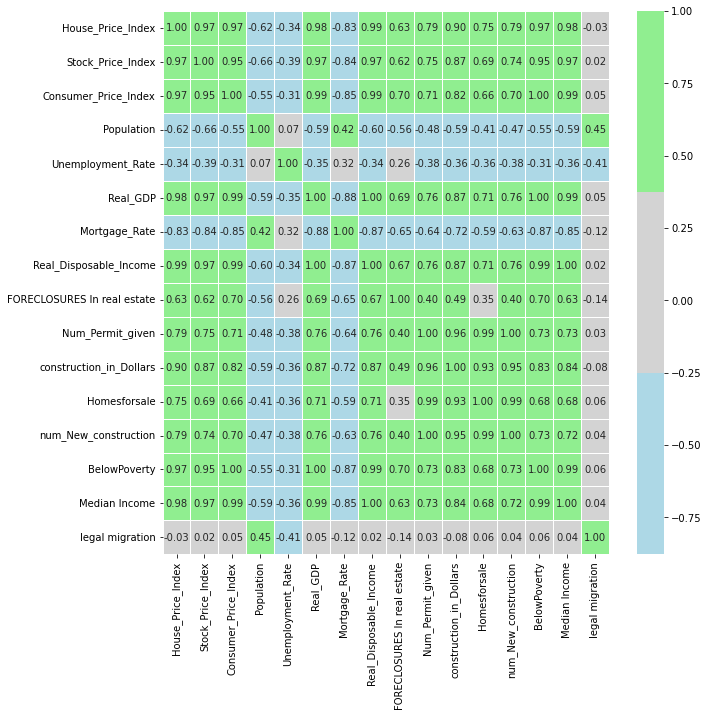

In [204]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),
           annot=True,
           linewidth=0.5,
           fmt=".2f",
           cmap=['lightblue','lightgrey','lightgreen'])
plt.savefig('heatmap.png')

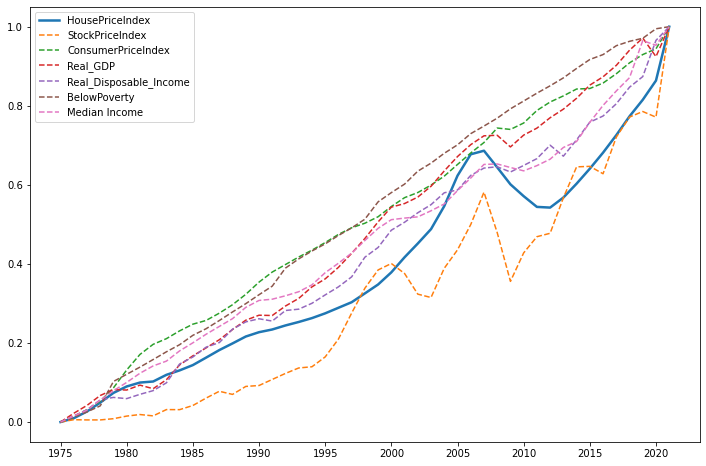

In [205]:
# Factors that have positive correlation
plt.figure(figsize=(12,8))
plt.plot(df2.Date,df2.House_Price_Index,lw=2.5,label='HousePriceIndex')

plt.plot(df2.Date,df2.Stock_Price_Index,ls='--',label='StockPriceIndex')
plt.plot(df2.Date,df2.Consumer_Price_Index,ls='--',label='ConsumerPriceIndex')

plt.plot(df2.Date,df2.Real_GDP,ls='--',label='Real_GDP')
plt.plot(df2.Date,df2.Real_Disposable_Income,ls='--',label='Real_Disposable_Income')

plt.plot(df2.Date,df2.BelowPoverty,ls='--',label='BelowPoverty')
plt.plot(df2.Date,df2['Median Income'],ls='--',label='Median Income')

plt.legend()
plt.savefig('positivecorr.png')

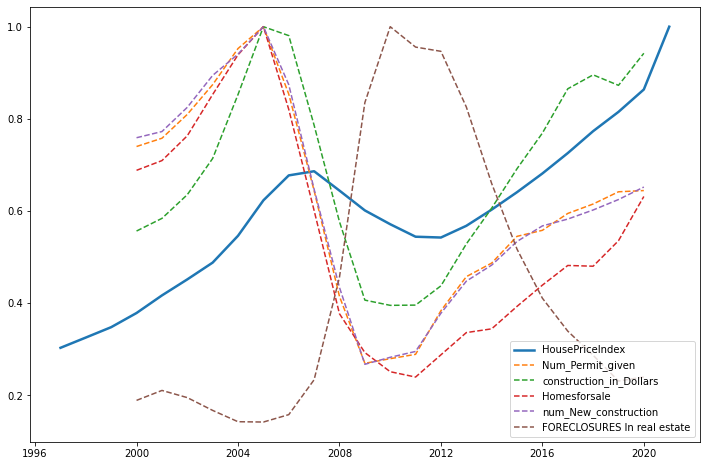

In [206]:
'''Factors having advanced positive correlation but can be used as predictors 
because they show same trend but prior to the actual house price Index
'''
plt.figure(figsize=(12,8))
plt.plot(df2.Date[22:],df2.House_Price_Index[22:],lw=2.5,label='HousePriceIndex')
plt.plot(df2.Date[25:],df2.Num_Permit_given[25:],ls='--',label='Num_Permit_given')

plt.plot(df2.Date[25:],df2.construction_in_Dollars[25:],ls='--',label='construction_in_Dollars')
plt.plot(df2.Date[25:],df2.Homesforsale[25:],ls='--',label='Homesforsale')
plt.plot(df2.Date[25:],df2.num_New_construction[25:],ls='--',label='num_New_construction')

# Factor having delayed positive correlation
plt.plot(df2.Date[25:],df2['FORECLOSURES In real estate'][25:],ls='--',label='FORECLOSURES In real estate')
plt.legend()
plt.savefig('Advanpositivecorr.png')

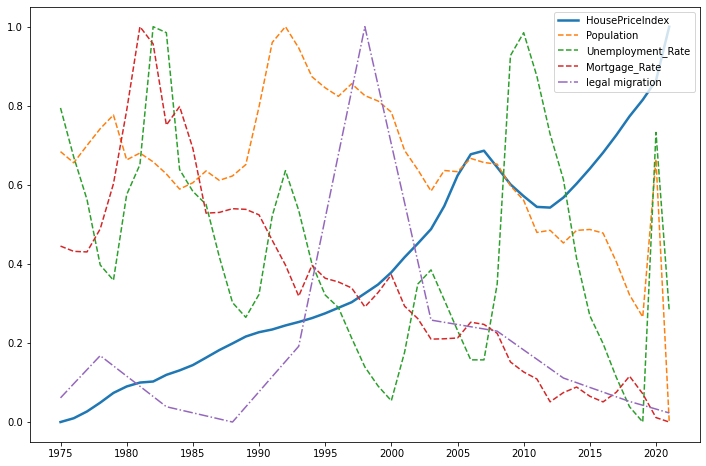

In [208]:
# Factors having negative correlation
plt.figure(figsize=(12,8))
plt.plot(df2.Date,df2.House_Price_Index,lw=2.5,label='HousePriceIndex')
plt.plot(df2.Date,df2.Population,ls='--',label='Population')

plt.plot(df2.Date,df2.Unemployment_Rate,ls='--',label='Unemployment_Rate')
plt.plot(df2.Date,df2.Mortgage_Rate,ls='--',label='Mortgage_Rate')

# Factor having no correlation
plt.plot(df2.Date,df2['legal migration'],ls='-.',label='legal migration')
plt.legend()
plt.savefig('negativecorr.png')

### Model Building (ML)

In [139]:
df = df[~(df['FORECLOSURES In real estate'] == 0)]
df = df.dropna()

In [160]:
X = df.iloc[0:,1:]
Y = pd.DataFrame(df.iloc[0:,0])

In [161]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=1)

In [198]:
model = DecisionTreeRegressor(max_depth=3)

In [199]:
model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=3)

In [200]:
preds=model.predict(xtest)

In [201]:
mean_absolute_error(ytest,preds)
# Poor accuracy because of lack of data

23.241854166666677

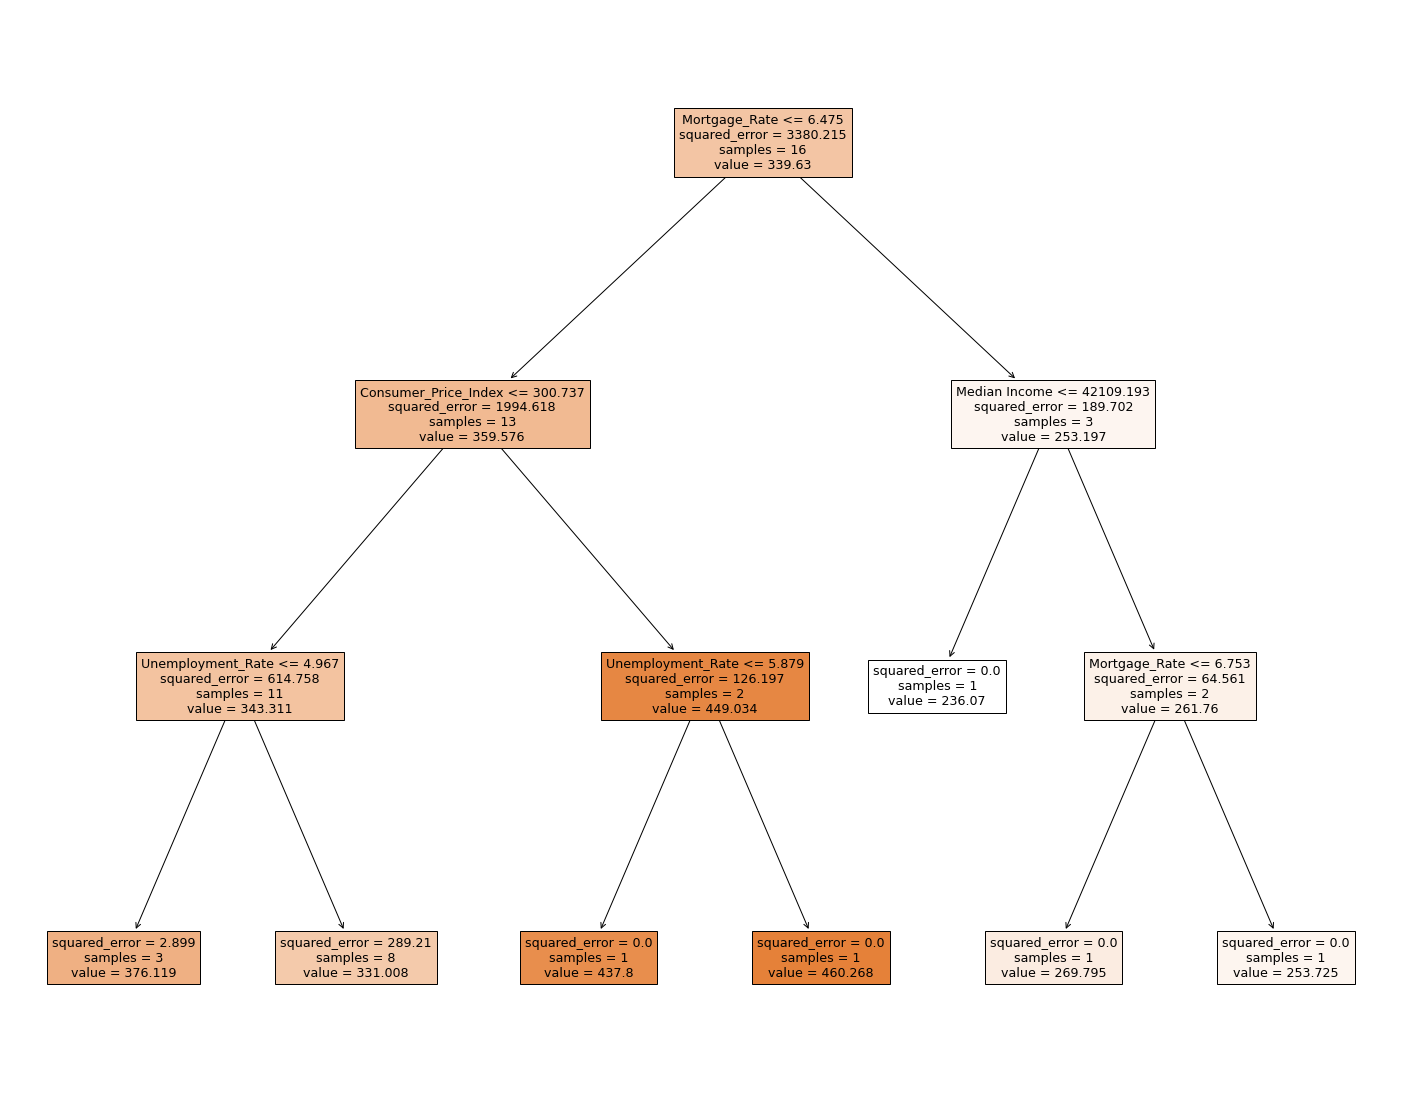

In [203]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,feature_names=df.columns[1:],
                  filled=True)
plt.savefig('Tree.png')